In [42]:
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from keras.utils.vis_utils import plot_model
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D,Dropout,Input,Activation,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

In [43]:
import glob
import os



In [44]:
from pathlib import Path
import pandas as pd
import numpy as np
import pandas as pd
import tensorflow as tf


In [45]:
# #da=os.path.join('D:/Dataset for Leak Detection and Localization in Water Distribution Systems/Accelerometer/Branched/Circumferential Crack/BR_CC_0.47 LPS_A2.csv')
# df = pd.read_csv(r'D:/Dataset for Leak Detection and Localization in Water Distribution Systems/Pressure/Branched/Circumferential Crack/BR_CC_0.47 LPS_A2.csv')
# #df = pd.read_csv(r'C:\Users\Ron\Desktop\products_sold.csv')
# print(df)

In [46]:
Circumferential = glob.glob(os.path.join('../input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Accelerometer/Branched/Circumferential Crack', "*.csv"))

cir = pd.concat((pd.read_csv(f) for f in Circumferential),axis = 1, ignore_index=True)


Gasket = glob.glob(os.path.join('../input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Accelerometer/Branched/Gasket Leak', "*.csv"))

gas = pd.concat((pd.read_csv(g) for g in Gasket),axis = 1, ignore_index=True)


Longitudinal = glob.glob(os.path.join('../input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Accelerometer/Branched/Longitudinal Crack', "*.csv"))

long = pd.concat((pd.read_csv(k) for k in Longitudinal),axis = 1, ignore_index=True)


NonLeak = glob.glob(os.path.join('../input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Accelerometer/Branched/NonLeak', "*.csv"))

non = pd.concat((pd.read_csv(l) for l  in NonLeak),axis = 1, ignore_index=True)


Orifice = glob.glob(os.path.join('../input/leak-detection/Dataset for Leak Detection and Localization in Water Distribution Systems/Dataset for Leak Detection and Localization in Water Distribution Systems/Accelerometer/Branched/Orifice Leak', "*.csv"))

Ori = pd.concat((pd.read_csv(m) for m in Orifice),axis = 1, ignore_index=True)





In [47]:
cir

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000000,0.004024,0.000000,0.007103,0.000000,-0.000970,0.000000,-0.000543,0.000000,0.015076,0.000000,0.001997,0.000000,-0.009415,0.000000,-0.000929
1,0.000039,0.003373,0.000039,0.013678,0.000039,-0.000620,0.000039,-0.001183,0.000039,0.009311,0.000039,0.002015,0.000039,-0.009323,0.000039,-0.001115
2,0.000078,0.002977,0.000078,0.013946,0.000078,-0.000458,0.000078,-0.001659,0.000078,0.004548,0.000078,0.001981,0.000078,-0.009076,0.000078,-0.001620
3,0.000117,0.001267,0.000117,0.008917,0.000117,-0.000074,0.000117,-0.001834,0.000117,0.000521,0.000117,0.002254,0.000117,-0.008839,0.000117,-0.001626
4,0.000156,0.000182,0.000156,0.008512,0.000156,-0.000187,0.000156,-0.001906,0.000156,-0.006283,0.000156,0.001869,0.000156,-0.008847,0.000156,-0.001092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940951,NaN,NaN,NaN,NaN,NaN,NaN,36.755898,0.000375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940952,NaN,NaN,NaN,NaN,NaN,NaN,36.755938,0.000555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940953,NaN,NaN,NaN,NaN,NaN,NaN,36.755977,-0.000043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940954,NaN,NaN,NaN,NaN,NaN,NaN,36.756016,-0.000453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
cir = cir.drop(cir.columns[[0,2,4,6,8,10,12,14]],axis = 1)
cir

,1,3,5,7,9,11,13,15
0,0.004024,0.007103,-0.000970,-0.000543,0.015076,0.001997,-0.009415,-0.000929
1,0.003373,0.013678,-0.000620,-0.001183,0.009311,0.002015,-0.009323,-0.001115
2,0.002977,0.013946,-0.000458,-0.001659,0.004548,0.001981,-0.009076,-0.001620
3,0.001267,0.008917,-0.000074,-0.001834,0.000521,0.002254,-0.008839,-0.001626
4,0.000182,0.008512,-0.000187,-0.001906,-0.006283,0.001869,-0.008847,-0.001092
...,...,...,...,...,...,...,...,...
940951,NaN,NaN,NaN,0.000375,NaN,NaN,NaN,NaN
940952,NaN,NaN,NaN,0.000555,NaN,NaN,NaN,NaN
940953,NaN,NaN,NaN,-0.000043,NaN,NaN,NaN,NaN
940954,NaN,NaN,NaN,-0.000453,NaN,NaN,NaN,NaN


In [49]:
cir
#cir=cir.iloc[0:1000]
cir.insert(8, "Label",'Circumferential', True)
cir

,1,3,5,7,9,11,13,15,Label
0,0.004024,0.007103,-0.000970,-0.000543,0.015076,0.001997,-0.009415,-0.000929,Circumferential
1,0.003373,0.013678,-0.000620,-0.001183,0.009311,0.002015,-0.009323,-0.001115,Circumferential
2,0.002977,0.013946,-0.000458,-0.001659,0.004548,0.001981,-0.009076,-0.001620,Circumferential
3,0.001267,0.008917,-0.000074,-0.001834,0.000521,0.002254,-0.008839,-0.001626,Circumferential
4,0.000182,0.008512,-0.000187,-0.001906,-0.006283,0.001869,-0.008847,-0.001092,Circumferential
...,...,...,...,...,...,...,...,...,...
940951,NaN,NaN,NaN,0.000375,NaN,NaN,NaN,NaN,Circumferential
940952,NaN,NaN,NaN,0.000555,NaN,NaN,NaN,NaN,Circumferential
940953,NaN,NaN,NaN,-0.000043,NaN,NaN,NaN,NaN,Circumferential
940954,NaN,NaN,NaN,-0.000453,NaN,NaN,NaN,NaN,Circumferential


In [50]:
gas = gas.drop(gas.columns[[0,2,4,6,8,10,12,14]],axis = 1)
#gas=gas.iloc[0:1000]

gas.insert(8, "Label",'Gasket', True)
gas

,1,3,5,7,9,11,13,15,Label
0,0.001889,0.001880,0.003963,-0.003960,0.000983,0.000554,0.000507,-0.002314,Gasket
1,0.000813,0.002170,0.003384,-0.003940,0.000831,0.000301,0.000559,-0.002494,Gasket
2,-0.006440,0.002052,0.000793,-0.003920,0.001309,0.002993,0.000767,-0.002450,Gasket
3,-0.010696,0.002436,-0.001089,-0.003914,0.000822,0.007914,0.000888,-0.002386,Gasket
4,-0.012663,0.002612,0.002353,-0.003853,0.001088,0.007360,0.000971,-0.002521,Gasket
...,...,...,...,...,...,...,...,...,...
935079,NaN,0.004539,NaN,NaN,NaN,NaN,NaN,NaN,Gasket
935080,NaN,0.004533,NaN,NaN,NaN,NaN,NaN,NaN,Gasket
935081,NaN,0.004580,NaN,NaN,NaN,NaN,NaN,NaN,Gasket
935082,NaN,0.004362,NaN,NaN,NaN,NaN,NaN,NaN,Gasket


In [51]:
long = long.drop(long.columns[[0,2,4,6,8,10,12,14]],axis = 1)
#long=long.iloc[0:1000]

long.insert(8, "Label",'Longitudinal', True)
long

,1,3,5,7,9,11,13,15,Label
0,0.000251,0.001774,0.009281,0.000561,0.017202,-0.021930,0.002530,-0.006958,Longitudinal
1,0.000001,0.001735,0.008092,0.000439,0.016271,-0.027950,0.002150,-0.007222,Longitudinal
2,0.000226,0.002081,0.010378,0.000597,0.016820,-0.036075,0.002151,-0.007329,Longitudinal
3,0.000312,0.002336,0.011095,0.000313,0.015964,-0.041864,0.002196,-0.007391,Longitudinal
4,0.000649,0.002757,0.009467,0.000442,0.013826,-0.037980,0.002152,-0.007484,Longitudinal
...,...,...,...,...,...,...,...,...,...
1048567,NaN,NaN,NaN,NaN,0.001603,NaN,NaN,NaN,Longitudinal
1048568,NaN,NaN,NaN,NaN,0.001454,NaN,NaN,NaN,Longitudinal
1048569,NaN,NaN,NaN,NaN,0.001405,NaN,NaN,NaN,Longitudinal
1048570,NaN,NaN,NaN,NaN,0.001308,NaN,NaN,NaN,Longitudinal


In [52]:
non = non.drop(non.columns[[0,2,4,6,8,10,12,14]],axis = 1)

#non=non.iloc[0:1000]

non.insert(8, "Label",'NonLeak', True)
non

,1,3,5,7,9,11,13,15,Label
0,0.000270,-0.000114,0.024519,-0.017962,-0.001231,0.003252,0.001196,0.001431,NonLeak
1,0.000326,-0.000227,0.031200,-0.016939,0.000462,0.003231,0.001353,0.001604,NonLeak
2,0.000327,-0.000294,0.031983,-0.011494,0.001493,0.002990,0.001466,0.001683,NonLeak
3,0.000555,-0.000329,0.030525,-0.012256,0.003289,0.003010,0.001620,0.001769,NonLeak
4,0.000700,-0.000299,0.032294,-0.012738,0.004935,0.003025,0.002020,0.001783,NonLeak
...,...,...,...,...,...,...,...,...,...
937068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004447,NonLeak
937069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004422,NonLeak
937070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004404,NonLeak
937071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004424,NonLeak


In [53]:
#Ori=Ori.iloc[0:1000]
Ori = Ori.drop(Ori.columns[[0,2,4,6,8,10,12,14]],axis = 1)

Ori.insert(8, "Label",'Orifice', True)
Ori


,1,3,5,7,9,11,13,15,Label
0,0.001176,-0.001238,0.017957,-0.011172,0.001658,-0.001458,0.000289,-0.000086,Orifice
1,0.001296,-0.001147,0.025365,-0.005611,0.001548,-0.001676,0.000234,0.002567,Orifice
2,0.001519,-0.000925,0.026388,0.004786,0.001694,-0.001889,0.000184,0.005325,Orifice
3,0.001722,-0.000857,0.025678,0.013685,0.001605,-0.002024,-0.000049,0.004530,Orifice
4,0.001936,-0.000955,0.025522,0.013333,0.001561,-0.002200,-0.000072,0.005425,Orifice
...,...,...,...,...,...,...,...,...,...
960679,NaN,0.000960,NaN,NaN,NaN,NaN,NaN,NaN,Orifice
960680,NaN,0.000793,NaN,NaN,NaN,NaN,NaN,NaN,Orifice
960681,NaN,0.000600,NaN,NaN,NaN,NaN,NaN,NaN,Orifice
960682,NaN,0.000621,NaN,NaN,NaN,NaN,NaN,NaN,Orifice


In [54]:
df1 = pd.concat([cir, gas,long,non,Ori])

In [55]:
df1

,1,3,5,7,9,11,13,15,Label
0,0.004024,0.007103,-0.000970,-0.000543,0.015076,0.001997,-0.009415,-0.000929,Circumferential
1,0.003373,0.013678,-0.000620,-0.001183,0.009311,0.002015,-0.009323,-0.001115,Circumferential
2,0.002977,0.013946,-0.000458,-0.001659,0.004548,0.001981,-0.009076,-0.001620,Circumferential
3,0.001267,0.008917,-0.000074,-0.001834,0.000521,0.002254,-0.008839,-0.001626,Circumferential
4,0.000182,0.008512,-0.000187,-0.001906,-0.006283,0.001869,-0.008847,-0.001092,Circumferential
...,...,...,...,...,...,...,...,...,...
960679,NaN,0.000960,NaN,NaN,NaN,NaN,NaN,NaN,Orifice
960680,NaN,0.000793,NaN,NaN,NaN,NaN,NaN,NaN,Orifice
960681,NaN,0.000600,NaN,NaN,NaN,NaN,NaN,NaN,Orifice
960682,NaN,0.000621,NaN,NaN,NaN,NaN,NaN,NaN,Orifice


In [56]:
#df2 = df1.drop(df1.columns[[0,]],axis = 1)


In [57]:
#engine="numba"
#df2 = df1.T.drop_duplicates().T


In [58]:
df2=df1

In [59]:
#extracted_col = long["Sample"]


In [60]:
#df2 = df2.join(extracted_col)
#df2

In [61]:
# df2.columns.values[0] = "Circumferential Crack"
# df2.columns.values[1] = "Gasket Leak"
#  df2.columns.values[2] = "Longitudinal Crack"
# df2.columns.values[3] = "NonLeak"
# df2.columns.values[4] = "Orifice Leak"
# df2

In [62]:
df2=df2.dropna()
df2

,1,3,5,7,9,11,13,15,Label
0,0.004024,0.007103,-0.000970,-0.000543,0.015076,0.001997,-0.009415,-0.000929,Circumferential
1,0.003373,0.013678,-0.000620,-0.001183,0.009311,0.002015,-0.009323,-0.001115,Circumferential
2,0.002977,0.013946,-0.000458,-0.001659,0.004548,0.001981,-0.009076,-0.001620,Circumferential
3,0.001267,0.008917,-0.000074,-0.001834,0.000521,0.002254,-0.008839,-0.001626,Circumferential
4,0.000182,0.008512,-0.000187,-0.001906,-0.006283,0.001869,-0.008847,-0.001092,Circumferential
...,...,...,...,...,...,...,...,...,...
917442,0.001823,-0.002599,0.000382,-0.002027,0.000882,0.003359,-0.001272,0.006665,Orifice
917443,0.001919,-0.002610,0.000272,-0.002360,0.000916,0.003263,-0.001347,0.007086,Orifice
917444,0.001884,-0.002675,0.000172,-0.003351,0.001000,0.003407,-0.001425,0.006035,Orifice
917445,0.001833,-0.002876,0.000237,-0.007041,0.001107,0.003522,-0.001248,0.007244,Orifice


In [63]:
df2.isnull().sum()

1        0
3        0
5        0
7        0
9        0
11       0
13       0
15       0
Label    0
dtype: int64

In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4502877 entries, 0 to 917446
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   1       float64
 1   3       float64
 2   5       float64
 3   7       float64
 4   9       float64
 5   11      float64
 6   13      float64
 7   15      float64
 8   Label   object 
dtypes: float64(8), object(1)
memory usage: 343.5+ MB


In [65]:
# data=df2

In [66]:
# df3=df2.iloc[0:3000]

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df2['Label']= label_encoder.fit_transform(df2['Label'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [67]:
y_train= df2[['Label']]
X_train= df2.drop(labels=['Label'], axis=1)

print('X_train has shape:',X_train.shape,'\ny_train has shape:',y_train.shape)

X_train has shape: (4502877, 8) 
y_train has shape: (4502877, 1)


In [68]:
# data

In [69]:
# df3=df2.iloc[0:3000]

In [70]:
# cat_col=['Circumferential Crack','Gasket Leak','Longitudinal Crack','NonLeak','Orifice Leak']

In [71]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [72]:
#df2.label.value_counts()

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_train , y_train, test_size=0.25, random_state=42)


In [74]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(3377157, 8, 1)

In [75]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(1125720, 8, 1)

In [76]:
model = Sequential() # initializing model
# input layer and first layer with 50 neurons
model.add(Conv1D(128, 3, padding="same",input_shape = (X_train.shape[1], 1), activation='relu'))
model.add(MaxPool1D(pool_size=(1)))  
model.add(Dropout(0.2))
model.add(Conv1D(64, 3, padding="same", activation='relu'))
model.add(MaxPool1D(pool_size=(1)))  
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=20))
# output layer with softmax activation
model.add(Dense(units=5,activation='softmax'))

In [77]:
model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [78]:
# summary of model layers
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 8, 128)            512       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 8, 128)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 128)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 64)             24640     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 8, 64)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [79]:
from keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

In [80]:
history = model.fit(X_train, y_train, epochs=300, batch_size=7000,validation_split=0.2 , callbacks=[early])


Epoch 1/300
386/386 [==============================] - 12s 27ms/step - loss: 0.8164 - accuracy: 0.6817 - val_loss: 0.3708 - val_accuracy: 0.8543
Epoch 2/300
386/386 [==============================] - 10s 26ms/step - loss: 0.3382 - accuracy: 0.8619 - val_loss: 0.2935 - val_accuracy: 0.8791
Epoch 3/300
386/386 [==============================] - 10s 26ms/step - loss: 0.3057 - accuracy: 0.8732 - val_loss: 0.2857 - val_accuracy: 0.8814
Epoch 4/300
386/386 [==============================] - 10s 26ms/step - loss: 0.2964 - accuracy: 0.8767 - val_loss: 0.2821 - val_accuracy: 0.8816
Epoch 5/300
386/386 [==============================] - 10s 26ms/step - loss: 0.2921 - accuracy: 0.8783 - val_loss: 0.2789 - val_accuracy: 0.8830
Epoch 6/300
386/386 [==============================] - 10s 26ms/step - loss: 0.2896 - accuracy: 0.8794 - val_loss: 0.2790 - val_accuracy: 0.8832
Epoch 7/300
386/386 [==============================] - 10s 27ms/step - loss: 0.2874 - accuracy: 0.8803 - val_loss: 0.2766 - val_ac

In [81]:
model.evaluate(X_test, y_test, verbose=1)


35179/35179 [==============================] - 70s 2ms/step - loss: 0.2683 - accuracy: 0.8874


[0.2683469355106354, 0.8874374032020569]

Text(0, 0.5, 'Loss')

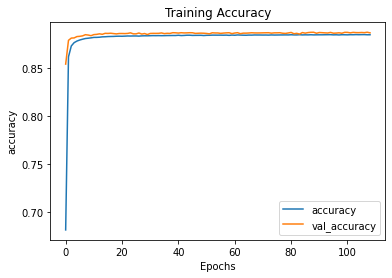

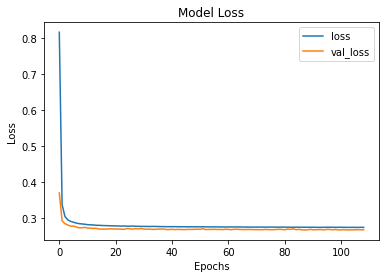

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)

pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")

pd.DataFrame(history.history)[["loss", "val_loss"]].plot()
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")